In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.utils.data as data

In [2]:
window = 60
BASE_DIR = "solar_flare_training_data"
DATA_FOLDER = f"xl_{window}_minutes"

In [3]:
df_x = pd.read_csv(os.path.join(BASE_DIR, DATA_FOLDER, "X_Train.csv"))
df_x = -np.log(df_x)
df_x.head(3)

,X_train_0,X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6,X_train_7,X_train_8,X_train_9,...,X_train_50,X_train_51,X_train_52,X_train_53,X_train_54,X_train_55,X_train_56,X_train_57,X_train_58,X_train_59
0,20.641028,20.218171,20.822297,20.469732,20.919976,20.532645,19.801277,19.961126,19.928336,19.688557,...,18.878191,19.197210,19.222368,19.251449,19.194109,18.975309,19.166626,19.102464,19.042172,19.438372
1,18.164932,18.177174,18.239550,18.183916,18.250335,18.300995,18.273493,17.977828,17.671964,17.498692,...,17.326842,17.401318,17.510121,17.651896,17.727534,17.817146,17.865155,17.915586,17.890052,17.848894
2,17.085680,17.239830,17.401318,17.569310,17.692442,17.817146,17.907002,17.987045,17.977828,17.881684,...,18.405089,18.419253,18.345043,18.245528,17.059704,15.955005,15.570800,14.558448,13.601552,11.588573


In [4]:
df_y = pd.read_csv(os.path.join(BASE_DIR, DATA_FOLDER, "Y_Train.csv"))
df_y['Y_train'] = -np.log(df_y['Y_train'])
df_y.head(3)

,Y_train
0,7.395050
1,6.912050
2,11.428059


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22, random_state=42)
X_train

,X_train_0,X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6,X_train_7,X_train_8,X_train_9,...,X_train_50,X_train_51,X_train_52,X_train_53,X_train_54,X_train_55,X_train_56,X_train_57,X_train_58,X_train_59
131778,17.706331,17.459690,17.205344,17.120100,17.180238,17.375871,17.539277,17.665230,17.741922,17.809364,...,18.347696,17.763901,16.910274,16.667761,16.808390,17.063374,17.226758,17.406486,17.606581,17.763901
94014,19.859773,19.878011,20.218171,19.947881,20.201076,20.289630,20.422104,20.280413,20.167740,21.005250,...,20.703463,21.310767,20.794302,20.919976,21.051770,21.698397,20.571158,21.396610,21.352768,21.352768
146346,18.371891,18.478007,18.442342,18.573166,18.598441,18.708363,18.749185,18.669142,18.424976,18.487126,...,17.924244,17.959646,17.438067,18.005737,18.220660,18.338443,18.345043,18.357035,18.462992,18.430731
69086,13.989009,13.986188,13.967665,13.955737,13.928146,13.912164,13.908487,13.930030,13.929882,13.923033,...,14.313505,14.335276,14.334043,14.332662,14.321472,14.271513,14.217610,14.237397,14.162244,13.009401
81268,13.147540,13.162296,13.175709,13.183505,13.196868,13.211054,13.217191,13.223333,13.224658,13.228174,...,12.963495,12.971798,12.977809,12.960724,12.775664,12.224231,11.880590,11.739554,11.612916,11.453306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114559,20.218171,20.504704,20.373616,20.253262,20.405332,20.159577,20.562606,20.389860,20.184269,20.592238,...,20.280413,20.308322,20.488759,20.192638,20.542135,20.592238,20.403255,20.438087,20.458706,20.308322
133606,16.972082,17.135786,17.275548,17.396176,17.575426,17.699363,17.824989,17.924244,17.996347,17.950677,...,19.569084,19.251449,19.222368,19.157631,19.039516,18.729538,18.781446,18.821158,18.901023,19.005614
143982,21.785408,21.760917,20.440237,20.337032,21.643134,23.148826,23.148826,22.048599,21.657575,21.823308,...,19.499490,20.088959,19.719488,20.218171,21.396610,21.036022,20.633164,21.352768,20.843015,20.902734
135451,18.757153,18.808446,18.903335,18.869202,18.887262,18.636707,18.457048,18.071030,18.275962,18.473479,...,18.741280,18.810554,18.896415,19.010756,18.871442,18.860294,18.821158,18.802150,18.808446,18.481038


## Build Dataset

In [6]:
def create_dataset(df_x, df_y):
    df_x = df_x.astype(float)
    df_y = df_y.astype(float)
    
    X, y = [], []
    for i, row in df_x.iterrows():
        X.append(list(row))

    for i, row in df_y.iterrows():
        y.append([row["Y_train"]])

    return torch.tensor(X), torch.tensor(y)

In [7]:
X_train, y_train = create_dataset(X_train, y_train)
X_val, y_val = create_dataset(X_val, y_val)
X_test, y_test = create_dataset(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

torch.Size([107515, 60]) torch.Size([107515, 1])
torch.Size([30326, 60]) torch.Size([30326, 1])
torch.Size([15316, 60]) torch.Size([15316, 1])


## LSTM model

In [8]:
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=window, hidden_size=200, num_layers=1, batch_first=True)
        self.linear = nn.Linear(200, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

## Train LSTM

In [9]:
model = LSTMModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

best_val_loss = float('inf')
patience = 5  
no_improvement = 0  

training_rmse , validation_rmse = [], []
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        training_rmse.append(train_rmse)
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        validation_rmse.append(test_rmse)
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

    if test_rmse < best_val_loss:
        # Save the model
        torch.save(model.state_dict(), f"best_model_{DATA_FOLDER}.pth")
        best_val_loss = test_rmse
        no_improvement = 0
    else:
        no_improvement += 1

    # Check if early stopping criteria met
    if no_improvement >= patience:
        print(f'Early stopping after {epoch + 1} epochs.')
        break


Epoch 0: train RMSE 0.5586, test RMSE 0.5732
Epoch 1: train RMSE 0.5218, test RMSE 0.5373
Epoch 2: train RMSE 0.5597, test RMSE 0.5755
Epoch 3: train RMSE 0.5180, test RMSE 0.5341
Epoch 4: train RMSE 0.6044, test RMSE 0.6192
Epoch 5: train RMSE 0.4819, test RMSE 0.5023
Epoch 6: train RMSE 0.4555, test RMSE 0.4763
Epoch 7: train RMSE 0.4698, test RMSE 0.4895
Epoch 8: train RMSE 0.9432, test RMSE 0.9579
Epoch 9: train RMSE 0.6747, test RMSE 0.6891
Epoch 10: train RMSE 0.6437, test RMSE 0.6587
Epoch 11: train RMSE 0.8724, test RMSE 0.8852
Early stopping after 12 epochs.


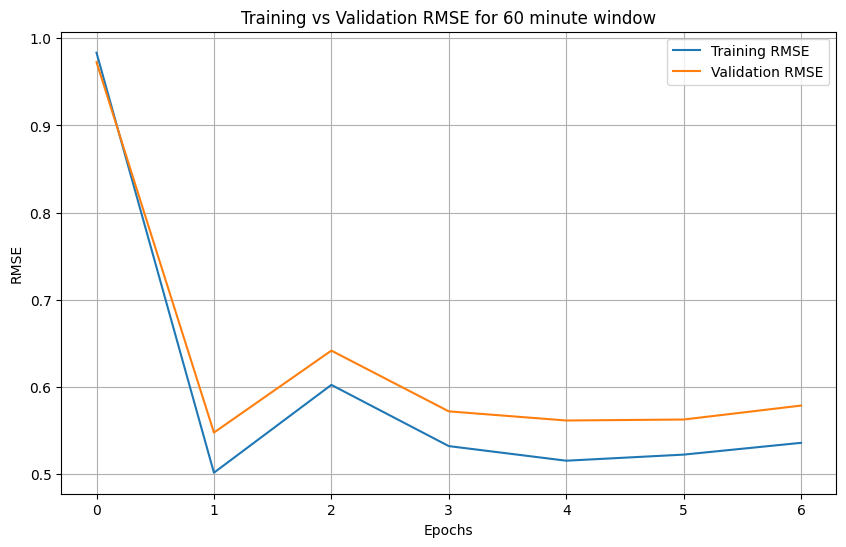

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

window = 60
epochs = range(len(training_rmse))
# Create a DataFrame
df = pd.DataFrame({'Epoch': epochs, 'Training RMSE': training_rmse, 'Validation RMSE': validation_rmse})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Training RMSE'], label='Training RMSE')
plt.plot(df['Epoch'], df['Validation RMSE'], label='Validation RMSE')
plt.title(f"Training vs Validation RMSE for {window} minute window")
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

## Collect prediction data in for different window size

In [ ]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred[:, -1]

# predicticted classes
converted_tensor = (y_pred <= 11.5).int()
y_pred = converted_tensor.tolist()

# actual classes
new_converted_tensor = (y_test <= 11.5).int()
y_test = new_converted_tensor.flatten().tolist()

In [ ]:
if os.path.exists("xl_result.csv"):
    df_results = pd.read_csv("xl_result.csv")
    df_results["xl_60_pred"] = y_pred
else:
    df_results = pd.DataFrame({"original_value":y_test, "xl_180_pred":y_pred})
df_results.to_csv("xl_result.csv", index = False)

In [85]:
df_results = pd.read_csv("xl_result.csv")
df_results

,original_value,xl_180_pred,xl_120_pred
0,1,0,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
15311,1,1,1
15312,0,0,0
15313,0,0,0
15314,0,0,0


## Apply Majority Voting method and Plot confusion matrix

In [87]:
df_results['majority_vote'] = df_results[['xl_180_pred', 'xl_120_pred', 'xl_60_pred']].sum(axis=1) >= 2
df_results['majority_vote'] = df_results['majority_vote'].astype(int)

df_results

,original_value,xl_180_pred,xl_120_pred,xl_60_pred,majority_vote
0,1,0,0,1,0
1,1,1,1,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
15311,1,1,1,1,1
15312,0,0,0,0,0
15313,0,0,0,0,0
15314,0,0,0,0,0


In [13]:
df_results = pd.read_csv("xl_result.csv")
y_test = df_results["original_value"].tolist()
y_pred = df_results["majority_vote"].tolist()

,original_value,xl_180_pred,xl_120_pred,xl_60_pred,majority_vote
0,1,0,0,1,0
1,1,1,1,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
15311,1,1,1,1,1
15312,0,0,0,0,0
15313,0,0,0,0,0
15314,0,0,0,0,0


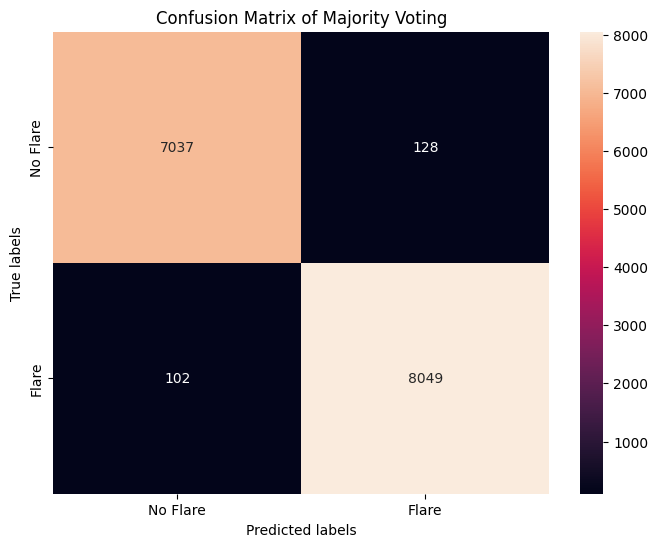

Precision: 0.9843463372875138
Recall: 0.9874861980125138
F1 Score: 0.9859137677609016
Accuracy: 0.984983024288326


In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Calculating precision, recall, f1 score, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

## Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Majority Voting')
plt.xticks([0.5, 1.5], ['No Flare', 'Flare'])
plt.yticks([0.5, 1.5], ['No Flare', 'Flare'])
plt.show()

## Results of precision, recall, f1 score, and accuracy
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


## Principal Componenet Analysis

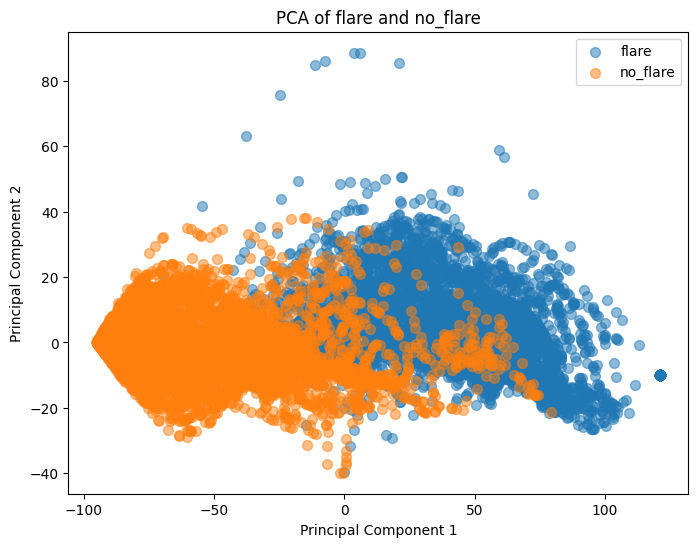

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

## Mapping for class labels
class_labels = {
    0: 'no_flare',
    1: 'flare'
}

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
pca_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, df_results['original_value'].reset_index(drop=True)], axis=1)
pca_df['class_name'] = pca_df['original_value'].map(class_labels)

plt.figure(figsize=(8,6))
for label, df in pca_df.groupby('class_name'):
    plt.scatter(df['Principal Component 1'], df['Principal Component 2'], label=label, s=50, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of flare and no_flare')
plt.legend()
plt.show()
